In [1]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import fiona
import datetime as dt
import contextily as ctx
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
DROOT = os.path.join('./1-data/')
drootf = lambda path: os.path.join(DROOT, path)

In [2]:
bag_path = drootf('explore-bag/snapshot_20230701.gpkg')
# We will use VBO, which is verblijfsobject=residinglocation (like home, industry or shops)
for layername in fiona.listlayers(bag_path):
    with fiona.open(bag_path, layer=layername) as src:
        print(layername, len(src))

ligplaats 13553
standplaats 42897
pand 11938570
vbo 10193977
woonplaats 2621
adres 10293009
ligplaats_status_code 3
ligplaats_nevenadres 24
standplaats_status_code 3
standplaats_nevenadres 60
pand_status_code 11
pand_woningtype 6
vbo_status_code 9
vbo_gerelateerdPand 10230242
vbo_nevenadres 29215
nummeraanduiding 10293009
nummeraanduiding_status_code 3
openbareruimte 291836
openbareruimte_status_code 3
woonplaats_status_code 3


(4.938184404627946, 52.69718243028993, 4.943932049601555, 52.819746789026915)


<Axes: >

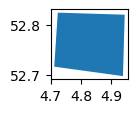

In [8]:
coords = [(4.723223399790179, 52.82387348804171), 
                (4.943932049601555, 52.819746789026915), 
                (4.938184404627946, 52.69718243028993), 
                (4.711532182168482, 52.716038791893496)]
mask = gpd.GeoSeries(Polygon(coords), crs="EPSG:4326")
bbox = (coords[2][0], coords[2][1], coords[1][0], coords[1][1])
print(bbox)
mask.plot(figsize=(1,1))

In [14]:
# With enough RAM, this should take about 5 minutes. 
bag_gdf = gpd.read_file(bag_path, layer='vbo', engine="pyogrio")
# bag_gdf = gpd.read_file(bag_path, layer='vbo', mask=mask)
bag_gdf.head(2)

,identificatie,oppervlakte,nummeraanduiding_id,pand_id,pand_id_geom,StatusCode,BEGINDATUM,EINDDATUM,VOORKOMENIDENTIFICATIE,TIJDSTIPREGISTRATIE,EINDREGISTRATIE,DOCUMENTDATUM,DOCUMENTNUMMER,bijeenkomst,cel,gezondheidszorg,industrie,kantoor,logies,onderwijs,overige_gebruiks,sport,winkel,woon,geometry
0,0000010000057469,72,0000200000057534,1883100000010452,1883100000010452,5,20180404,0,2,2018-04-04T11:59:28.000,,20180404,correctie,False,False,False,False,False,False,False,False,False,False,True,POINT (188391.891 334586.438)
1,0003010000125985,69,0003200000134057,0003100000122770,0003100000122770,4,20100720,0,1,2010-10-20T08:43:37.000,,20100720,FB 2010/PANDEN001,False,False,False,False,False,False,False,False,False,False,True,POINT (252767.344 593745.500)
2,0003010000125986,69,0003200000134058,0003100000122770,0003100000122770,4,20100720,0,1,2010-10-20T08:43:38.000,,20100720,FB 2010/PANDEN001,False,False,False,False,False,False,False,False,False,False,True,POINT (252769.562 593744.875)
3,0003010000125988,78,0003200000134060,0003100000118116,0003100000118116,5,20230307,0,5,2023-03-07T08:23:22.000,,20230307,E2023-BNU-033,False,False,False,False,False,False,False,False,False,True,False,POINT (252894.234 593698.500)
4,0003010000125989,60,0003200000134061,0003100000118116,0003100000118116,5,20110420,0,2,2011-04-20T14:44:17.000,,20110420,2011/AMR004,False,False,False,False,False,False,False,False,False,False,True,POINT (252891.000 593704.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10193972,5600010000302911,1678,5600200000303091,0957100000302811,0957100000302811,5,20180208,0,3,2018-02-08T14:45:31.000,,20180208,20275-2017:019947,False,False,False,True,False,False,False,False,False,False,False,POINT (195783.625 353657.125)
10193973,5600010000302912,170,5600200000303092,0957100000261257,0957100000261257,5,20180208,0,2,2018-02-08T14:45:35.000,,20180208,20275-2017:019947,True,False,False,False,False,False,False,False,False,False,False,POINT (198049.812 356330.344)
10193974,5600010000302913,230,5600200000303093,0957100000261257,0957100000261257,5,20180208,0,2,2018-02-08T14:45:38.000,,20180208,20275-2017:019947,True,False,False,False,False,False,False,False,False,False,False,POINT (198048.703 356313.156)
10193975,5600010000302914,427,5600200000303094,0957100000242840,0957100000242840,5,20180208,0,2,2018-02-08T14:45:42.000,,20180208,20275-2017:019947,False,False,False,False,False,False,False,False,False,False,True,POINT (200290.766 360276.125)


In [17]:
sample = bag_gdf[bag_gdf.within(mask.to_crs(bag_gdf.crs).iloc[0])]
sample

,identificatie,oppervlakte,nummeraanduiding_id,pand_id,pand_id_geom,StatusCode,BEGINDATUM,EINDDATUM,VOORKOMENIDENTIFICATIE,TIJDSTIPREGISTRATIE,EINDREGISTRATIE,DOCUMENTDATUM,DOCUMENTNUMMER,bijeenkomst,cel,gezondheidszorg,industrie,kantoor,logies,onderwijs,overige_gebruiks,sport,winkel,woon,geometry
3878662,0366010000000119,510,0366200000000119,0366100000000234,0366100000000234,4,19950314,0,1,2010-11-26T12:16:52.000,,19950314,BV 305-94,False,False,False,True,False,False,False,False,False,False,True,POINT (120312.539 537125.375)
3878663,0366010000000120,189,0366200000000120,0366100000000207,0366100000000207,4,20211129,0,2,2021-11-29T15:39:06.083,,20211129,Z-287610/DOC.482303,False,False,False,False,False,False,False,False,False,False,True,POINT (120295.742 537014.250)
3878664,0366010000000121,153,0366200000000121,0366100000000200,0366100000000200,4,20211129,0,2,2021-11-29T15:39:06.547,,20211129,Z-287610/DOC.482303,False,False,False,False,False,False,False,False,False,False,True,POINT (120285.219 536967.938)
3878665,0366010000000122,159,0366200000000122,0366100000000194,0366100000000194,4,19950523,0,1,2010-11-26T12:16:53.000,,19950523,BV 89,False,False,False,False,False,False,False,False,False,False,True,POINT (120277.961 536932.438)
3878666,0366010000000123,82,0366200000000123,0366100000000194,0366100000000194,4,20100824,0,1,2010-11-26T12:16:53.000,,20100824,092853,False,False,False,True,False,False,False,False,False,False,False,POINT (120303.266 536915.625)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184829,1980010000260772,139,1980200000260771,1980100000260770,1980100000260770,1,20221010,20230704,1,2022-10-10T15:03:13.240,2023-07-04T09:55:44.017,20221010,D2022-10-000842,False,False,False,False,False,False,False,False,False,False,True,POINT (114744.102 526050.438)
10184835,1980010000260991,70,1980200000260990,0416100000202102,0416100000202102,4,20221114,0,1,2022-11-17T13:52:09.202,,20221114,607148,False,False,False,False,False,False,False,False,False,True,False,POINT (115634.711 525255.062)
10184836,1980010000260993,87,1980200000260992,0398100000034961,0398100000034961,4,20230131,0,2,2023-02-02T14:21:42.779,,20230131,721704,False,False,False,False,False,True,False,False,False,False,False,POINT (118823.320 525072.000)
10184935,1980010000261653,197,1980200000261652,0416100000202062,0416100000202066,4,20230331,0,2,2023-04-04T10:15:58.126,,20230331,536392-241,False,False,False,False,False,False,False,False,False,False,True,POINT (115804.148 525073.000)


In [21]:
uses_list = ['bijeenkomst', 'cel', 'gezondheidszorg', 'industrie', 'kantoor', 'logies', 'onderwijs', 'overige_gebruiks', 'sport', 'winkel', 'woon']

In [18]:
sample[['bijeenkomst', 'cel', 'gezondheidszorg', 'industrie', 'kantoor', 'logies', 'onderwijs', 'overige_gebruiks', 'sport', 'winkel', 'woon']].sum()

bijeenkomst           364
cel                     0
gezondheidszorg       295
industrie            2352
kantoor               488
logies               1019
onderwijs              75
overige_gebruiks     1649
sport                  67
winkel                598
woon                27305
dtype: int64

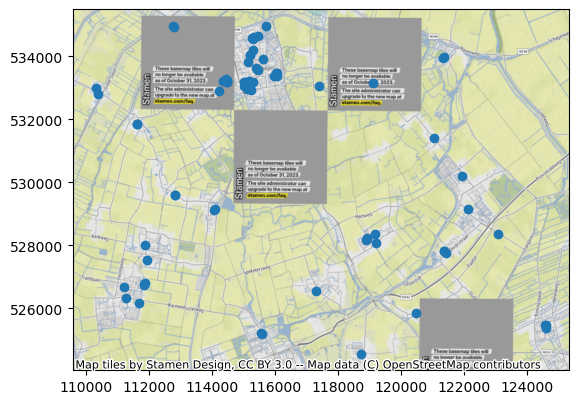

In [26]:
ax = sample[sample.onderwijs].plot()
ctx.add_basemap(ax=ax, crs=sample.crs)